# Creating CNNs in Keras for Fashion-mnist Dataset

This notebook contains 3 models:
- a network with manually implemented inception modules
- a network with manually implemented resnet connections
- a basic cnn

# Load Data

In [0]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# make last dimension of size 1 to denote greyscale
x_train.shape += (1,) 
x_test.shape += (1,)

# normalize
x_train = x_train/255
x_test = x_test/255

# get data parameters
inputShape =  x_train.shape[1:]
classCount = len(set(y_test))

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [0]:
# onehot encode truth values 
y_test = to_categorical(y_test, classCount)
y_train = to_categorical(y_train, classCount)

class_labels = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"}

# CNN with Inception Modules

## Define Model Structure

In [0]:
from keras.models import Model
from keras.utils import plot_model
from keras import optimizers, regularizers
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, Add, concatenate, BatchNormalization, Dropout

In [0]:
# define input layer
inputLayer = Input(shape=inputShape)

# conv block 1
network = Conv2D(filters=64,kernel_size=(5, 5), activation='relu', name='input_conv64')(inputLayer)
network = Conv2D(filters=128,kernel_size=(3, 3), activation='relu', name='input_conv128')(network)
network = MaxPooling2D((3,3))(network)
network = BatchNormalization()(network)

# inception module 1
conv_triXtri = Conv2D(128, (1,1), padding='same', activation='relu', name='b1_1x1_pre3x3')(network)
conv_triXtri = Conv2D(128, (3,3), padding='same', activation='relu', name='b1_3x3')(conv_triXtri)
conv_fiveXfive = Conv2D(128, (1,1), padding='same', activation='relu', name='b1_1x1_pre5x5')(network)
conv_fiveXfive = Conv2D(128, (5,5), padding='same', activation='relu', name='b1_5x5')(conv_fiveXfive)
pooling = MaxPooling2D((3,3), strides=(1,1), padding='same', name='b1_pool')(network)
pooling = Conv2D(128, (1,1), padding='same', activation='relu', name='b1_pool1x1')(pooling)
conv_oneXone = Conv2D(128, (1,1), padding='same', activation='relu', name='b1_1x1')(network)
# combining components of inception module
inception_mod = concatenate([conv_oneXone, conv_triXtri, conv_fiveXfive, pooling], axis = 3)
network = BatchNormalization()(inception_mod)

# inception module 2
conv_triXtri = Conv2D(128, (1,1), padding='same', activation='relu', name='b2_1x1_pre3x3')(network)
conv_triXtri = Conv2D(128, (3,3), padding='same', activation='relu', name='b2_3x3')(conv_triXtri)
conv_fiveXfive = Conv2D(128, (1,1), padding='same', activation='relu', name='b2_1x1_pre5x5')(network)
conv_fiveXfive = Conv2D(128, (5,5), padding='same', activation='relu', name='b2_5x5')(conv_fiveXfive)
pooling = MaxPooling2D((3,3), strides=(1,1), padding='same', name='b2_pool')(network)
pooling = Conv2D(128, (1,1), padding='same', activation='relu', name='b2_pool1x1')(pooling)
conv_oneXone = Conv2D(128, (1,1), padding='same', activation='relu', name='b2_1x1')(network)
# combining components of inception module
inception_mod = concatenate([conv_oneXone, conv_triXtri, conv_fiveXfive, pooling], axis = 3)
network = BatchNormalization()(inception_mod)

# inception module 3
conv_triXtri = Conv2D(128, (1,1), padding='same', activation='relu', name='b3_1x1_pre3x3')(network)
conv_triXtri = Conv2D(128, (3,3), padding='same', activation='relu', name='b3_3x3')(conv_triXtri)
conv_fiveXfive = Conv2D(128, (1,1), padding='same', activation='relu', name='b3_1x1_pre5x5')(network)
conv_fiveXfive = Conv2D(128, (5,5), padding='same', activation='relu', name='b3_5x5')(conv_fiveXfive)
pooling = MaxPooling2D((3,3), strides=(1,1), padding='same', name='b3_pool')(network)
pooling = Conv2D(128, (1,1), padding='same', activation='relu', name='b3_pool1x1')(pooling)
conv_oneXone = Conv2D(128, (1,1), padding='same', activation='relu', name='b3_1x1')(network)
# combining components of inception module
inception_mod = concatenate([conv_oneXone, conv_triXtri, conv_fiveXfive, pooling], axis = 3)
network = BatchNormalization()(inception_mod)

# flatten before fully connected layers
network = Flatten()(network)

# create and connect dense/output layers
network = Dense(256, activation='relu')(network)
network = Dense(128, activation='relu')(network)
outputLayer = Dense(10, activation='softmax', name='output')(network)

inceptionModel = Model(inputs=inputLayer, outputs=outputLayer)
adam = optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=True) 
inceptionModel.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

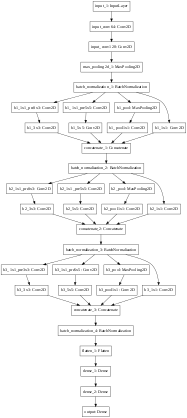

In [8]:
# visualize the inception blocks
plot_model(inceptionModel, dpi=20)

## Training

In [0]:
import matplotlib.pyplot as plt

In [10]:
history = inceptionModel.fit(x_train, y_train,validation_split=0.1, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 69s 1ms/step - loss: 0.6774 - accuracy: 0.7817 - val_loss: 0.4665 - val_accuracy: 0.8388
Epoch 2/10
54000/54000 [==============================] - 66s 1ms/step - loss: 0.3544 - accuracy: 0.8732 - val_loss: 0.3305 - val_accuracy: 0.8860
Epoch 3/10
54000/54000 [==============================] - 66s 1ms/step - loss: 0.2925 - accuracy: 0.8951 - val_loss: 0.2881 - val_accuracy: 0.8973
Epoch 4/10
54000/54000 [==============================] - 66s 1ms/step - loss: 0.2549 - accuracy: 0.9078 - val_loss: 0.2588 - val_accuracy: 0.9060
Epoch 5/10
54000/54000 [==============================] - 65s 1ms/step - loss: 0.2229 - accuracy: 0.9194 - val_loss: 0.2658 - val_accuracy: 0.9012
Epoch 6/10
54000/54000 [==============================] - 66s 1ms/step - loss: 0.1998 - accuracy: 0.9251 - val_loss: 0.2529 - val_accuracy: 0.9123
Epoch 7/10
54000/54000 [==============================] - 66s 1ms/ste

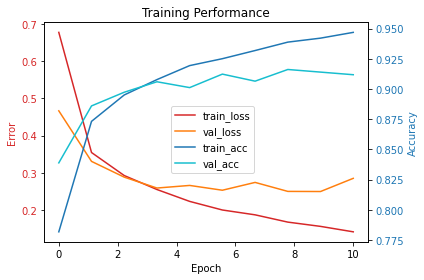

In [16]:
length = len(history.history['accuracy'])
xAxis = np.linspace(0 , length,num=length)
fig, ax1 = plt.subplots()

ax1.title.set_text('Training Performance')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error', color='tab:red')
ax1.plot(xAxis, history.history['loss'], color='tab:red', label="train_loss")
ax1.plot(xAxis, history.history['val_loss'], color='tab:orange', label="val_loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue') 
ax2.plot(xAxis, history.history['accuracy'], color='tab:blue', label="train_acc")
ax2.plot(xAxis, history.history['val_accuracy'], color='tab:cyan', label="val_acc")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='center')

fig.tight_layout()
plt.show()

## Evaluate Model

In [0]:
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [18]:
predictions = inceptionModel.predict(x_test)

preds = np.argmax(predictions, axis=1)
ground_truth = np.argmax(y_test, axis=1)

f1 = f1_score(ground_truth, preds, average='macro')
acc = accuracy_score(ground_truth, preds)

print("Test Performance")
print(f"F1: {f1}")
print(f"Accuracy: {acc}")

Test Performance
F1: 0.9060408808298692
Accuracy: 0.906


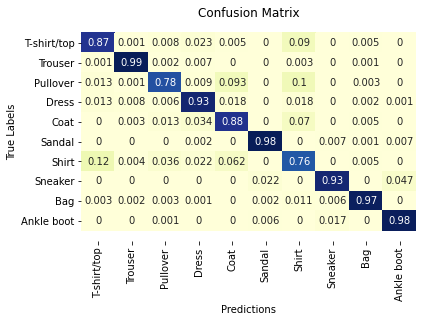

In [20]:
conf_matrix = confusion_matrix(ground_truth, preds)

conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1, keepdims=True)
heat_map = sns.heatmap(conf_matrix,
            yticklabels =class_labels.values(),
            xticklabels=class_labels.values(),
            annot=True,
            cbar=False,
            cmap="YlGnBu")
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print(classification_report(ground_truth, preds, target_names=class_labels.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.86      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.92      0.78      0.84      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.83      0.88      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.72      0.76      0.74      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# CNN with ResNet Connections

## Define Model Structure

In [0]:
from keras.models import Model
from keras import optimizers
from keras.utils import plot_model
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, Add, concatenate, BatchNormalization, Dropout

In [0]:
# define input layer
inputLayer = Input(shape=inputShape)

# conv block 1
network = Conv2D(64,kernel_size=(5, 5),activation='relu')(inputLayer)
network = Conv2D(64,kernel_size=(3, 3),activation='relu')(network)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(3, 3))(network)

# skip connection 1
skip_con = network # save inputs for skip connection 
network = Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same')(network)
network = BatchNormalization()(network)
nework = Add()([network,skip_con])# add inputs for skip connection

# skip connection 2
skip_con = network # save inputs for skip connection 
network = Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same')(network)
network = BatchNormalization()(network)
nework = Add()([network,skip_con])# add inputs for skip connection

# skip connection 3
skip_con = Conv2D(128, kernel_size=(1,1), padding='valid')(network) # save inputs for skip connection 
network = Conv2D(128, kernel_size=(3, 3),activation='relu', padding='same')(network)
network = BatchNormalization()(network)
nework = Add()([network,skip_con])# add inputs for skip connection

# skip connection 4
skip_con = network # save inputs for skip connection 
network = Conv2D(128, kernel_size=(3, 3),activation='relu', padding='same')(network)
network = BatchNormalization()(network)
nework = Add()([network,skip_con])# add inputs for skip connection

# skip connection 5
skip_con = Conv2D(256, kernel_size=(1,1), padding='valid')(network) # save inputs for skip connection 
network = Conv2D(256, kernel_size=(3, 3),activation='relu', padding='same')(network)
network = BatchNormalization()(network)
nework = Add()([network,skip_con])# add inputs for skip connection

# skip connection 6
skip_con = network # save inputs for skip connection 
network = Conv2D(256, kernel_size=(3, 3),activation='relu', padding='same')(network)
network = BatchNormalization()(network)
nework = Add()([network,skip_con])# add inputs for skip connection

# flatten before fully connected layer
network = Flatten()(network)

# create and connect dense/output layers
network = Dense(256, activation='relu')(network)
network = Dense(128, activation='relu')(network)
outputLayer = Dense(10, activation='softmax')(network)

resNetmodel = Model(inputs=inputLayer, outputs=outputLayer)
adam = optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=True) 
resNetmodel.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

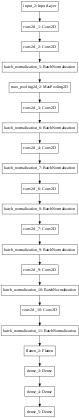

In [24]:
# visualize the inception blocks
plot_model(resNetmodel, dpi=20)

# keras' plot_model can't show the residual connections
# they're there...

## Training

In [0]:
import matplotlib.pyplot as plt

In [26]:
history = resNetmodel.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 740us/step - loss: 0.7258 - accuracy: 0.7528 - val_loss: 0.5523 - val_accuracy: 0.7986
Epoch 2/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.4105 - accuracy: 0.8506 - val_loss: 0.3771 - val_accuracy: 0.8660
Epoch 3/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.3341 - accuracy: 0.8774 - val_loss: 0.3309 - val_accuracy: 0.8796
Epoch 4/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.2981 - accuracy: 0.8897 - val_loss: 0.3353 - val_accuracy: 0.8790
Epoch 5/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.2686 - accuracy: 0.9014 - val_loss: 0.2886 - val_accuracy: 0.8956
Epoch 6/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.2486 - accuracy: 0.9075 - val_loss: 0.2991 - val_accuracy: 0.8903
Epoch 7/10
60000/60000 [==============================] 

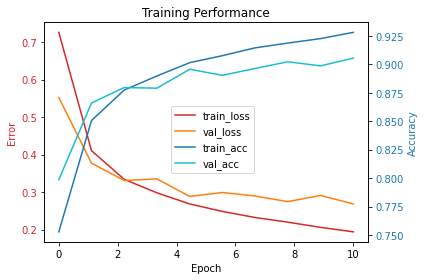

In [27]:
length = len(history.history['accuracy'])
xAxis = np.linspace(0 , length,num=length)
fig, ax1 = plt.subplots()

ax1.title.set_text('Training Performance')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error', color='tab:red')
ax1.plot(xAxis, history.history['loss'], color='tab:red', label="train_loss")
ax1.plot(xAxis, history.history['val_loss'], color='tab:orange', label="val_loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue') 
ax2.plot(xAxis, history.history['accuracy'], color='tab:blue', label="train_acc")
ax2.plot(xAxis, history.history['val_accuracy'], color='tab:cyan', label="val_acc")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='center')

fig.tight_layout()
plt.show()

## Evaluate Performance

In [0]:
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [29]:
predictions = resNetmodel.predict(x_test)

preds = np.argmax(predictions, axis=1)
ground_truth = np.argmax(y_test, axis=1)

f1 = f1_score(ground_truth, preds, average='macro')
acc = accuracy_score(ground_truth, preds)

print("Test Performance")
print(f"F1: {f1}")
print(f"Accuracy: {acc}")

Test Performance
F1: 0.9053265174508847
Accuracy: 0.9054


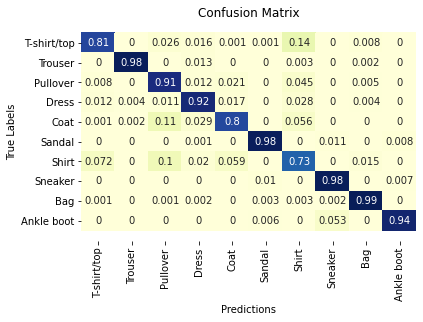

In [30]:
conf_matrix = confusion_matrix(ground_truth, preds)

conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1, keepdims=True)
heat_map = sns.heatmap(conf_matrix,
            yticklabels =class_labels.values(),
            xticklabels=class_labels.values(),
            annot=True,
            cbar=False,
            cmap="YlGnBu")
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [31]:
print(classification_report(ground_truth, preds, target_names=class_labels.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.81      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.78      0.91      0.84      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.89      0.80      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.73      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Basic CNN with Dropout

## Define Model Structure

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.utils import to_categorical, plot_model
from keras import optimizers

In [0]:
# define input layer
inputLayer = Input(shape=inputShape)

# conv block 1
network = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(inputLayer)
network = Dropout(0.05)(network)
network = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(inputLayer)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(2, 2))(network)

# conv block 2
network = Dropout(0.05)(network)
network = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(network)
network = Dropout(0.05)(network)
network = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(network)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(2, 2))(network)

# conv block 3
network = Dropout(0.05)(network)
network = Conv2D(128, kernel_size=(3, 3), padding='same' ,activation='relu')(network)
network = Dropout(0.05)(network)
network = Conv2D(256, kernel_size=(3, 3), padding='same' ,activation='relu')(network)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(2, 2))(network)

# conv block 5
network = Dropout(0.05)(network)
network = Conv2D(256, kernel_size=(3, 3),padding='same',activation='relu')(network)
network = Dropout(0.05)(network)
network = Conv2D(256, kernel_size=(3, 3),padding='same',activation='relu')(network)
network = BatchNormalization()(network)
network = MaxPooling2D(pool_size=(2, 2))(network)

# flatten before fully connected layer
network = Flatten()(network)

# dense/output layers
network = Dense(256, activation='relu')(network)
network = Dense(128, activation='relu')(network)
outputLayer = Dense(10, activation='softmax')(network)

basicmodel = Model(inputs=inputLayer, outputs=outputLayer)
adam = optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=True) 
basicmodel.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

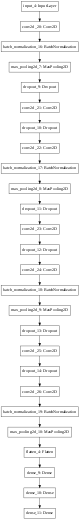

In [48]:
# visualize the inception blocks
plot_model(basicmodel, dpi=20)

## Training

In [0]:
import matplotlib.pyplot as plt

In [42]:
history = basicmodel.fit(x_train, y_train, validation_split=0.1, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 37s 678us/step - loss: 0.5732 - accuracy: 0.7874 - val_loss: 0.4342 - val_accuracy: 0.8395
Epoch 2/10
54000/54000 [==============================] - 35s 649us/step - loss: 0.3431 - accuracy: 0.8765 - val_loss: 0.3873 - val_accuracy: 0.8580
Epoch 3/10
54000/54000 [==============================] - 35s 656us/step - loss: 0.2875 - accuracy: 0.8966 - val_loss: 0.3461 - val_accuracy: 0.8740
Epoch 4/10
54000/54000 [==============================] - 35s 652us/step - loss: 0.2474 - accuracy: 0.9098 - val_loss: 0.2741 - val_accuracy: 0.9015
Epoch 5/10
54000/54000 [==============================] - 35s 651us/step - loss: 0.2247 - accuracy: 0.9184 - val_loss: 0.3045 - val_accuracy: 0.8925
Epoch 6/10
54000/54000 [==============================] - 35s 652us/step - loss: 0.2056 - accuracy: 0.9255 - val_loss: 0.3480 - val_accuracy: 0.8795
Epoch 7/10
54000/54000 [==============================] -

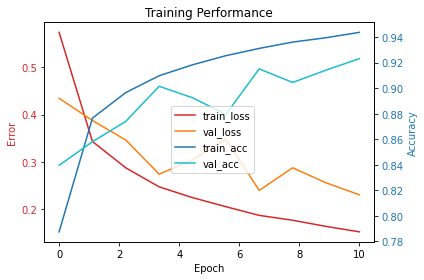

In [43]:
length = len(history.history['accuracy'])
xAxis = np.linspace(0 , length,num=length)
fig, ax1 = plt.subplots()

ax1.title.set_text('Training Performance')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error', color='tab:red')
ax1.plot(xAxis, history.history['loss'], color='tab:red', label="train_loss")
ax1.plot(xAxis, history.history['val_loss'], color='tab:orange', label="val_loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue') 
ax2.plot(xAxis, history.history['accuracy'], color='tab:blue', label="train_acc")
ax2.plot(xAxis, history.history['val_accuracy'], color='tab:cyan', label="val_acc")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='center')

fig.tight_layout()
plt.show()

## Evaluate Performance

In [0]:
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [45]:
predictions = basicmodel.predict(x_test)

preds = np.argmax(predictions, axis=1)
ground_truth = np.argmax(y_test, axis=1)

f1 = f1_score(ground_truth, preds, average='macro')
acc = accuracy_score(ground_truth, preds)

print("Test Performance")
print(f"F1: {f1}")
print(f"Accuracy: {acc}")

Test Performance
F1: 0.9208335870018404
Accuracy: 0.9208


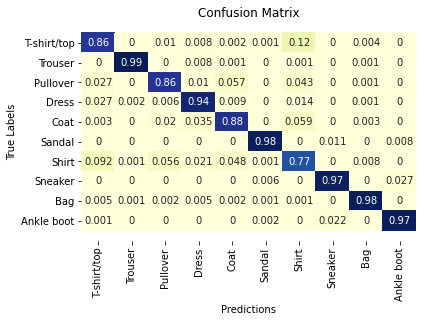

In [46]:
conf_matrix = confusion_matrix(ground_truth, preds)

conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1, keepdims=True)
heat_map = sns.heatmap(conf_matrix,
            yticklabels =class_labels.values(),
            xticklabels=class_labels.values(),
            annot=True,
            cbar=False,
            cmap="YlGnBu")
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [47]:
print(classification_report(ground_truth, preds, target_names=class_labels.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.90      0.86      0.88      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.88      0.88      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.77      0.77      0.77      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

